# 🌀 Nonlinear Classification with SVM and RBF Kernel

In this notebook, we will:
1. Generate **concentric circle data** that is **not linearly separable** in 2D.  
2. Visualize why a **linear classifier** would fail.  
3. Use **Support Vector Machine (SVM) with RBF kernel** to classify the data.  
4. Visualize the **nonlinear decision boundary** learned by the model.  
5. Experiment interactively with kernel type, C, and gamma.  

---

In [1]:
# 📌 Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import ipywidgets as widgets
from ipywidgets import interact

## 1. Generate Concentric Circle Data

We will create two classes:
- **Blue Class (inner circle):** Small radius around the origin  
- **Red Class (outer circle):** Larger radius around the origin  

Such data is **not linearly separable** in the 2D plane.

In [2]:
# Set random seed for reproducibility
np.random.seed(0)  

# Number of total samples
n_samples = 200  

# --- Blue points (inner circle) ---
radius_blue = np.random.randn(n_samples // 2) * 0.3
angles_blue = np.random.rand(n_samples // 2) * 2 * np.pi
X_blue = np.array([
    radius_blue * np.cos(angles_blue), 
    radius_blue * np.sin(angles_blue)
]).T

# --- Red points (outer circle) ---
radius_red = np.random.randn(n_samples // 2) * 0.3 + 1.5
angles_red = np.random.rand(n_samples // 2) * 2 * np.pi
X_red = np.array([
    radius_red * np.cos(angles_red), 
    radius_red * np.sin(angles_red)
]).T

# Combine the datasets
X = np.vstack([X_blue, X_red])
y = np.hstack([
    np.zeros(n_samples // 2),  # Label 0 for Blue Class
    np.ones(n_samples // 2)    # Label 1 for Red Class
])

## 2. Visualize the Data  

We plot the two classes (inner circle = blue, outer circle = red).  
Notice how **no straight line** can separate these two classes.

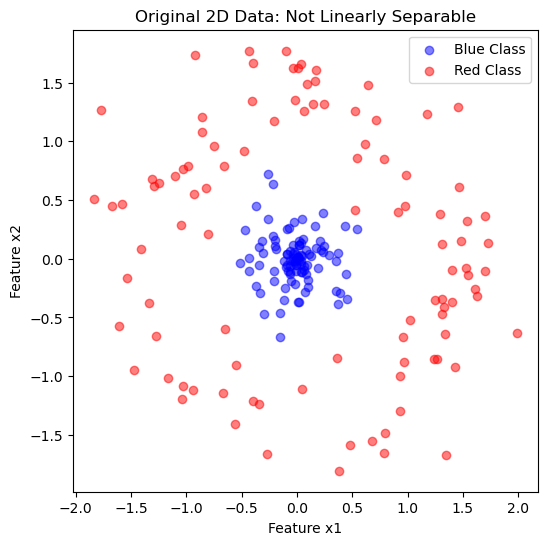

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(X_blue[:, 0], X_blue[:, 1], c='blue', label='Blue Class', alpha=0.5)
plt.scatter(X_red[:, 0], X_red[:, 1], c='red', label='Red Class', alpha=0.5)
plt.title("Original 2D Data: Not Linearly Separable")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

## 3. Train an SVM Classifier with RBF Kernel  

- **Why RBF kernel?**  
  The Radial Basis Function (RBF) kernel implicitly transforms data into a higher-dimensional space.  
  In this space, the classes **become linearly separable**.  

We train the SVM with:
- `C = 1` → Regularization parameter  
- `gamma = 1` → Defines how far the influence of a training example reaches  

In [4]:
# Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1, gamma=1)
model.fit(X, y)

SVC(C=1, gamma=1)

## 4. Plot the Decision Boundary  

We create a mesh grid of points, compute the **decision function**, and plot:
- **Blue region** for Blue Class  
- **Red region** for Red Class  
- **Black contour line** = decision boundary (where decision function = 0)  

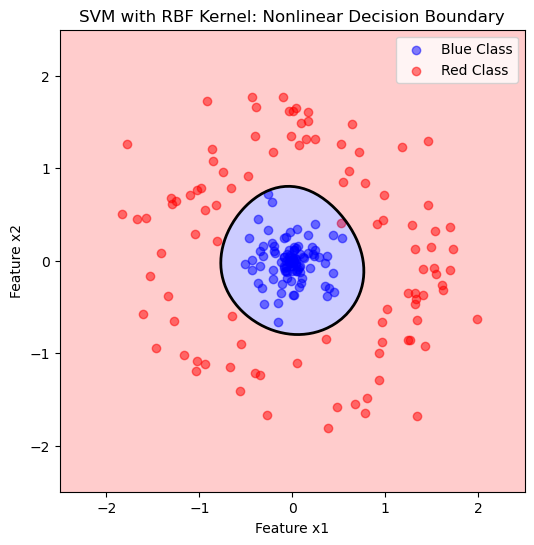

In [10]:
# Create a grid for visualization
xx, yy = np.meshgrid(
    np.linspace(-2.5, 2.5, 100),
    np.linspace(-2.5, 2.5, 100)
)

# Compute decision function values
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X_blue[:, 0], X_blue[:, 1], c='blue', label='Blue Class', alpha=0.5)
plt.scatter(X_red[:, 0], X_red[:, 1], c='red', label='Red Class', alpha=0.5)

# Decision boundary & regions
plt.contourf(xx, yy, Z, levels=[-100, 0, 100], alpha=0.2, colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.title("SVM with RBF Kernel: Nonlinear Decision Boundary")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

## 🔧 5. Interactive Experiment: Linear vs RBF Kernel

- **Kernel = linear** → tries to separate classes with a straight line (fails here).  
- **Kernel = rbf** → maps data to higher dimensions and finds a nonlinear boundary.  

Use the dropdown (kernel), and sliders for `C` and `gamma` (only affects RBF) to experiment.

In [6]:
def plot_svm_boundary(kernel="rbf", C=1.0, gamma=1.0):
    # Train SVM with given parameters
    if kernel == "linear":
        model = SVC(kernel=kernel, C=C)
    else:
        model = SVC(kernel=kernel, C=C, gamma=gamma)
    
    model.fit(X, y)
    
    # Decision boundary mesh
    xx, yy = np.meshgrid(
        np.linspace(-2.5, 2.5, 200),
        np.linspace(-2.5, 2.5, 200)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot results
    plt.figure(figsize=(6, 6))
    plt.scatter(X_blue[:, 0], X_blue[:, 1], c='blue', label='Blue Class', alpha=0.5)
    plt.scatter(X_red[:, 0], X_red[:, 1], c='red', label='Red Class', alpha=0.5)
    
    # Boundary & filled regions
    plt.contourf(xx, yy, Z, levels=[-100, 0, 100], alpha=0.2, colors=['blue', 'red'])
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    
    plt.title(f"SVM with {kernel.upper()} Kernel\\nC={C}, gamma={gamma if kernel=='rbf' else 'N/A'}")
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")
    plt.legend()
    plt.show()

# Interactive controls
interact(
    plot_svm_boundary,
    kernel=widgets.Dropdown(options=["linear", "rbf"], value="rbf", description="Kernel"),
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description="C"),
    gamma=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description="gamma")
);

interactive(children=(Dropdown(description='Kernel', index=1, options=('linear', 'rbf'), value='rbf'), FloatLo…

# 🎯 Summary

- The dataset of concentric circles is **not linearly separable**.  
- A **linear classifier** fails.  
- **SVM with RBF kernel** transforms the data into a higher-dimensional space where it becomes separable.  
- The decision boundary is **nonlinear** in the original 2D space.  
- Interactive sliders let us explore how `C` and `gamma` affect the decision boundary.